In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


house = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/dsc-v2-mod1-final-project-dc-ds-career-042219/master/kc_house_data.csv')

<Figure size 360x360 with 0 Axes>

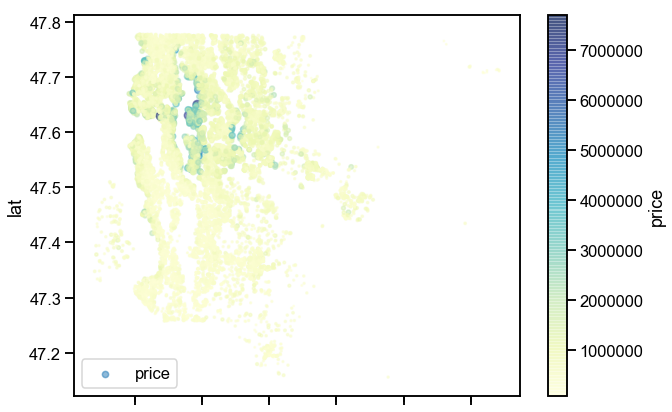

In [3]:
sns.set_context('talk')
fig2 = plt.figure(figsize=(5,5))
plt.tight_layout()
ax3 = house.plot(kind='scatter', x='long', y='lat', s=house['price']/100000, label="price", c="price", cmap=plt.get_cmap("YlGnBu"), colorbar=True, alpha=0.5, figsize=(10,7))
ax3.set_xticklabels([-122.5, -122.2 -121.9 -121.6, -121.3])
sns.set_style('white', {'axes.linewidth': 0.5})
plt.rcParams['xtick.major.size'] = 20
plt.rcParams['xtick.major.width'] = 4
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
# fig2.savefig('map')
plt.show()
   

In [31]:
import math
from ast import literal_eval
def merc(Coords):
#     Coordinates = literal_eval(Coords)
    lat = Coords[0]
    lon = Coords[1]
    
    r_major = 6378137.000
    x = r_major * math.radians(lon)
    scale = x/lon
    y = 180.0/math.pi * math.log(math.tan(math.pi/4.0 + 
        lat * (math.pi/180.0)/2.0)) * scale
    return (x, y)

In [32]:
house['location'] = list(zip(house['lat'], house['long']))


In [102]:
house['coords_x'] = house['location'].apply(lambda x: merc(x)[0])
house['coords_y'] = house['location'].apply(lambda x: merc(x)[1])
house['map_dot'] = house['price']/700000
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,location,coords_x,coords_y,map_dot
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0.0,98178,47.5112,-122.257,1340,5650,"(47.5112, -122.257)",-1.360959e+07,6.025918e+06,0.317000
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1991.0,98125,47.7210,-122.319,1690,7639,"(47.721000000000004, -122.319)",-1.361649e+07,6.060564e+06,0.768571
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,NaN,98028,47.7379,-122.233,2720,8062,"(47.7379, -122.23299999999999)",-1.360692e+07,6.063361e+06,0.257143
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0.0,98136,47.5208,-122.393,1360,5000,"(47.5208, -122.39299999999999)",-1.362473e+07,6.027500e+06,0.862857
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,98074,47.6168,-122.045,1800,7503,"(47.6168, -122.045)",-1.358599e+07,6.043339e+06,0.728571


In [109]:
print(house['coords_x'].min())
print(house['coords_x'].max())
print(house['coords_y'].min())
print(house['coords_y'].max())
print(house['price'].max())
print(house['price'].min())

-13638752.692501085
-13504724.025585985
5967558.149778038
6069934.83011953
7700000.0
78000.0


In [107]:
# from bokeh.plotting import figure, show, output_file
# from bokeh.tile_providers import CARTODBPOSITRON

# output_file("tile.html")

# # range bounds supplied in web mercator coordinates
# p = figure(x_range=(-13638000, -13504000), y_range=(5967000, 6069000),
#            x_axis_type="mercator", y_axis_type="mercator", title="House Values in Kin County Washington")
# p.add_tile(CARTODBPOSITRON)

# p.circle(house['coords_x'], house['coords_y'], size=house['price']/10000000, color=house['price'], alpha = .4)

# show(p)

In [2]:
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.tile_providers import CARTODBPOSITRON
from bokeh.models import Circle, BasicTicker, ColorBar
from bokeh.models.mappers import ColorMapper, LinearColorMapper
from bokeh.palettes import Viridis5
from bokeh.io import output_notebook

output_file("tile.html")

# range bounds supplied in web mercator coordinates
p = figure(x_range=(-13638000, -13504000), y_range=(5967000, 6069000),
           x_axis_type="mercator", y_axis_type="mercator", title="House Sale Values in King County Washington")
p.add_tile(CARTODBPOSITRON)

source = ColumnDataSource(
    data=dict(
        lat=house.coords_x.tolist(),
        lon=house.coords_y.tolist(),
        size=house.map_dot.tolist(),
        color=house.price.tolist(),
        legend=house.price.tolist()))

color_mapper = LogColorMapper(palette="Viridis256", low=78000, high=70700000)

output_notebook()

circle = Circle(x='lat', y='lon', size='size', fill_color={'field': 'color', 'transform': color_mapper}, fill_alpha = .4, line_color=None)

p.add_glyph(source, circle)

color_bar = ColorBar(color_mapper=color_mapper, ticker=BasicTicker(),
                     label_standoff=12, border_line_color=None, location=(0,0))

p.add_layout(color_bar, 'right')

show(p)

NameError: name 'house' is not defined

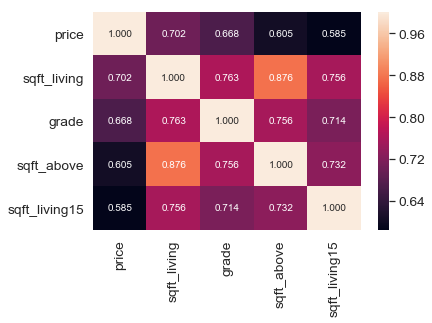

In [6]:

house = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/dsc-v2-mod1-final-project-dc-ds-career-042219/master/kc_house_data.csv')

corrmat = house.corr()
k = 5
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(house[cols].values.T)

fig = plt.figure()
sns.set(font_scale=1.25)
ax = sns.heatmap(cm,annot=True, fmt='.3f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
fig.savefig("KC_housing_heatmap")

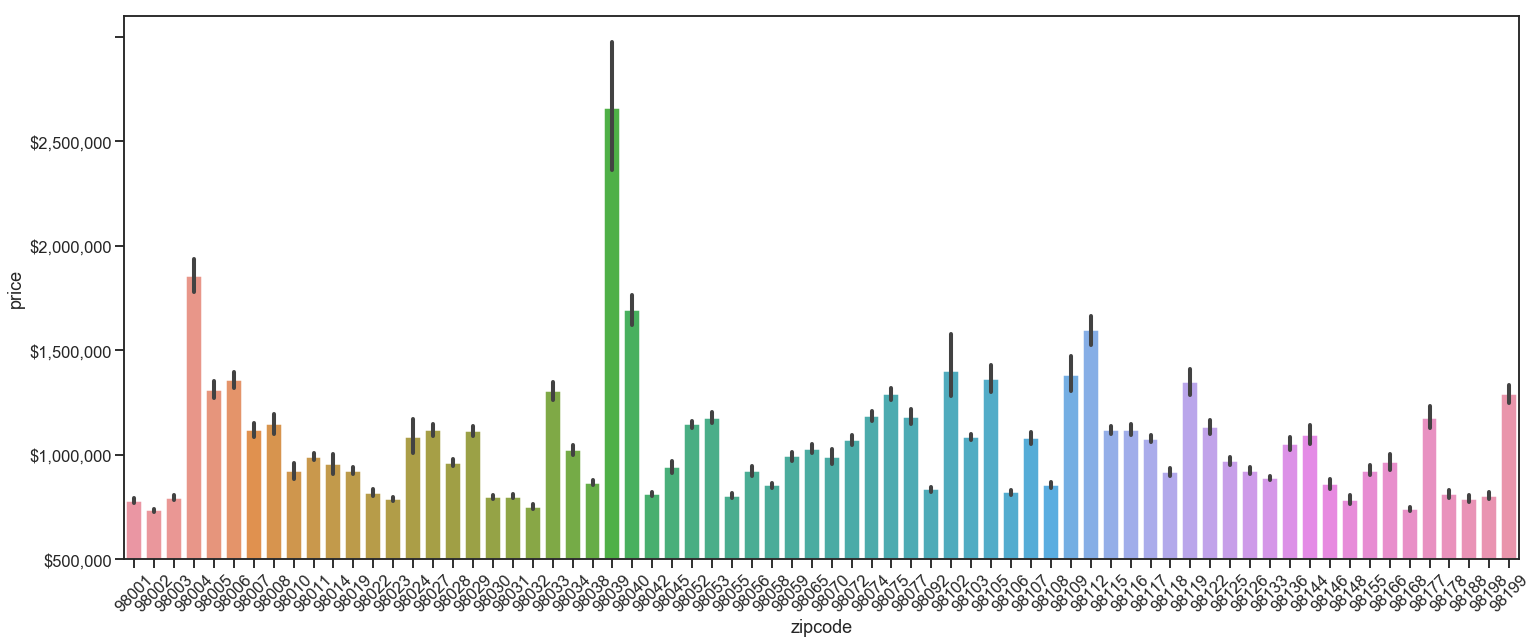

In [14]:
# This plot shows the house price central tendency by zipcode

sns.set_context('talk')
fig = plt.figure(figsize=(25,10))
plt.tight_layout()

ax1 = sns.barplot(x='zipcode', y='price', data=house)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax1.set_yticklabels(['$500,000', '$1,000,000', '$1,500,000', '$2,000,000', '$2,500,000'])
fig.savefig("zipcodes")
plt.show()